# Exercise 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1)

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
def show_digit(index):
    digit_array = np.array(X.loc[index])
    digit_im = digit_array.reshape(28,28)
    plt.imshow(digit_im, cmap="binary")
    plt.axis("off")
    plt.show()    

In [4]:
# Define the test set and the training set (already determined previously)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

In [8]:
#First test of KNN

knn = KNeighborsClassifier()

#knn.fit(X_train_scaled, y_train)

In [8]:
knn.score(X_train_scaled, y_train)

0.96425

In [28]:
knn.predict(X_train_scaled)

array(['3', '0', '4', ..., '5', '6', '8'], dtype=object)

In [32]:
#from sklearn.model_selection import GridSearchCV

params = {'weights':['uniform', 'distance'], 'n_neighbors': [2,4,6,8,10]}

gridsearch = GridSearchCV(knn, params, cv=3, verbose=3)

In [33]:
gridsearch.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ....n_neighbors=2, weights=uniform;, score=0.926 total time=  38.7s
[CV 2/3] END ....n_neighbors=2, weights=uniform;, score=0.929 total time=  39.0s
[CV 3/3] END ....n_neighbors=2, weights=uniform;, score=0.929 total time=  40.2s
[CV 1/3] END ...n_neighbors=2, weights=distance;, score=0.935 total time=  41.6s
[CV 2/3] END ...n_neighbors=2, weights=distance;, score=0.939 total time=  41.6s
[CV 3/3] END ...n_neighbors=2, weights=distance;, score=0.941 total time=  42.1s
[CV 1/3] END ....n_neighbors=4, weights=uniform;, score=0.935 total time= 1.0min
[CV 2/3] END ....n_neighbors=4, weights=uniform;, score=0.939 total time= 1.0min
[CV 3/3] END ....n_neighbors=4, weights=uniform;, score=0.938 total time=  57.4s
[CV 1/3] END ...n_neighbors=4, weights=distance;, score=0.943 total time=  56.1s
[CV 2/3] END ...n_neighbors=4, weights=distance;, score=0.944 total time=  57.0s
[CV 3/3] END ...n_neighbors=4, weights=distance;

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8, 10],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [34]:
gridsearch.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [35]:
params = {'weights':['distance'], 'n_neighbors': [12,18,24,30]}

In [36]:
gridsearch = GridSearchCV(knn, params, cv=3, verbose=3, scoring='accuracy')
gridsearch.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ..n_neighbors=12, weights=distance;, score=0.933 total time=  46.2s
[CV 2/3] END ..n_neighbors=12, weights=distance;, score=0.937 total time=  49.2s
[CV 3/3] END ..n_neighbors=12, weights=distance;, score=0.939 total time=  50.9s
[CV 1/3] END ..n_neighbors=18, weights=distance;, score=0.929 total time=  52.5s
[CV 2/3] END ..n_neighbors=18, weights=distance;, score=0.931 total time=  52.0s
[CV 3/3] END ..n_neighbors=18, weights=distance;, score=0.935 total time=  57.8s
[CV 1/3] END ..n_neighbors=24, weights=distance;, score=0.924 total time=  54.3s
[CV 2/3] END ..n_neighbors=24, weights=distance;, score=0.926 total time=  58.3s
[CV 3/3] END ..n_neighbors=24, weights=distance;, score=0.931 total time=  58.3s
[CV 1/3] END ..n_neighbors=30, weights=distance;, score=0.920 total time= 1.0min
[CV 2/3] END ..n_neighbors=30, weights=distance;, score=0.923 total time=  56.1s
[CV 3/3] END ..n_neighbors=30, weights=distance;,

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [12, 18, 24, 30],
                         'weights': ['distance']},
             scoring='accuracy', verbose=3)

In [37]:
params = {'weights':['distance'], 'n_neighbors': [1,2,3,4,5,6,7,8]}
gridsearch = GridSearchCV(knn, params, cv=3, verbose=3, scoring='accuracy')
gridsearch.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END ...n_neighbors=1, weights=distance;, score=0.935 total time=  42.9s
[CV 2/3] END ...n_neighbors=1, weights=distance;, score=0.939 total time=  46.1s
[CV 3/3] END ...n_neighbors=1, weights=distance;, score=0.941 total time=  48.3s
[CV 1/3] END ...n_neighbors=2, weights=distance;, score=0.935 total time=  47.8s
[CV 2/3] END ...n_neighbors=2, weights=distance;, score=0.939 total time=  47.5s
[CV 3/3] END ...n_neighbors=2, weights=distance;, score=0.941 total time=  50.4s
[CV 1/3] END ...n_neighbors=3, weights=distance;, score=0.940 total time=  52.9s
[CV 2/3] END ...n_neighbors=3, weights=distance;, score=0.942 total time=  54.5s
[CV 3/3] END ...n_neighbors=3, weights=distance;, score=0.943 total time=  49.2s
[CV 1/3] END ...n_neighbors=4, weights=distance;, score=0.943 total time= 1.1min
[CV 2/3] END ...n_neighbors=4, weights=distance;, score=0.944 total time= 1.0min
[CV 3/3] END ...n_neighbors=4, weights=distance;,

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8],
                         'weights': ['distance']},
             scoring='accuracy', verbose=3)

In [38]:
gridsearch.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [39]:
gridsearch.score(X_test_scaled, y_test) #Best score (for now)

0.9474

In [40]:
predict = gridsearch.predict(X_test_scaled)

In [41]:
predict

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [42]:
len(predict)

10000

In [43]:
test = (predict == y_test)

In [45]:
sum(test)

9474

In [46]:
gridsearch.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [47]:
params = {'weights':['distance'], 'n_neighbors': [30,50,100]}
gridsearch = GridSearchCV(knn, params, cv=3, verbose=3, scoring='accuracy')
gridsearch.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ..n_neighbors=30, weights=distance;, score=0.920 total time=  44.7s
[CV 2/3] END ..n_neighbors=30, weights=distance;, score=0.923 total time=  43.7s
[CV 3/3] END ..n_neighbors=30, weights=distance;, score=0.927 total time=  44.4s
[CV 1/3] END ..n_neighbors=50, weights=distance;, score=0.911 total time=  47.0s
[CV 2/3] END ..n_neighbors=50, weights=distance;, score=0.914 total time=  46.5s
[CV 3/3] END ..n_neighbors=50, weights=distance;, score=0.918 total time=  48.1s
[CV 1/3] END .n_neighbors=100, weights=distance;, score=0.897 total time=  54.1s
[CV 2/3] END .n_neighbors=100, weights=distance;, score=0.899 total time=  53.2s
[CV 3/3] END .n_neighbors=100, weights=distance;, score=0.905 total time=  53.9s


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [30, 50, 100], 'weights': ['distance']},
             scoring='accuracy', verbose=3)

In [50]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, predict)

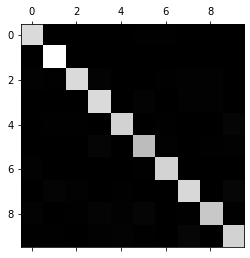

In [51]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [52]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

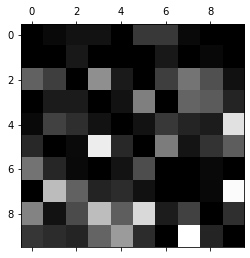

In [53]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
params = {'weights':['distance'], 'n_neighbors': [3,4,5], 'p': [1,3]}
gridsearch = GridSearchCV(knn, params, cv=3, verbose=3, scoring='accuracy')
gridsearch.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END n_neighbors=3, p=1, weights=distance;, score=0.956 total time= 8.8min
[CV 2/3] END n_neighbors=3, p=1, weights=distance;, score=0.956 total time= 8.6min
[CV 3/3] END n_neighbors=3, p=1, weights=distance;, score=0.958 total time= 8.4min


In [7]:
params = {'weights':['distance'], 'n_neighbors':[128, 256, 512]}
gridsearch = GridSearchCV(knn, params, cv=2, verbose=3, scoring='accuracy')
gridsearch.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END .n_neighbors=128, weights=distance;, score=0.884 total time= 1.1min
[CV 2/2] END .n_neighbors=128, weights=distance;, score=0.889 total time=  58.5s
[CV 1/2] END .n_neighbors=256, weights=distance;, score=0.857 total time=  58.8s
[CV 2/2] END .n_neighbors=256, weights=distance;, score=0.865 total time= 1.1min
[CV 1/2] END .n_neighbors=512, weights=distance;, score=0.817 total time= 1.2min
[CV 2/2] END .n_neighbors=512, weights=distance;, score=0.828 total time=  59.0s


GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [128, 256, 512],
                         'weights': ['distance']},
             scoring='accuracy', verbose=3)

In [ ]:
params = {'weights':['distance'], 'n_neighbors':[4], 'algorithm':['brute'], 'p':[1,2,3]}
gridsearch = GridSearchCV(knn, params, cv=2, verbose=3, scoring='accuracy')
gridsearch.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END algorithm=brute, n_neighbors=4, p=1, weights=distance;, score=0.954 total time=14.5min
[CV 2/2] END algorithm=brute, n_neighbors=4, p=1, weights=distance;, score=0.956 total time= 9.6min
[CV 1/2] END algorithm=brute, n_neighbors=4, p=2, weights=distance;, score=0.939 total time=  47.7s
[CV 2/2] END algorithm=brute, n_neighbors=4, p=2, weights=distance;, score=0.939 total time=  47.0s


# Exercise 2

In [5]:
from scipy.ndimage.interpolation import shift

def shift_and_print_digit(index, ypixls, xpixls): #y positive: shifts down, x positive: shifts right
    digit_array = np.array(X_train.loc[index])
    digit_im = digit_array.reshape(28,28)
    digit_im_shift = shift(digit_im, [ypixls,xpixls], cval=0)
    plt.imshow(digit_im, cmap="binary")
    plt.axis("off")
    plt.show()
    plt.imshow(digit_im_shift, cmap="binary")
    plt.axis("off")
    plt.show()
    


In [6]:
def shift_and_reshapeback(digit, ypixls, xpixls): #returns back the shifted 1-d (1x784) mnist image
    digit_im = digit.reshape(28,28)
    digit_im_shift = shift(digit_im, [ypixls,xpixls], cval=0)
    return digit_im_shift.reshape(1,784)


In [42]:
#Example of np.vstack

A = np.array([[1,2,3],[4,5,6]])

In [46]:
B = np.array([7,8,9])
C = np.vstack((A,B))

In [47]:
C

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [7]:
X_train_arr = np.array(X_train)
X_train_shifted_r = np.copy(X_train_arr)
X_train_shifted_l = np.copy(X_train_arr)
X_train_shifted_u = np.copy(X_train_arr)
X_train_shifted_d = np.copy(X_train_arr)

In [8]:
for i in range(len(X_train_arr)):
    X_train_shifted_r[i] = shift_and_reshapeback(X_train_arr[i], 0, 1)
    X_train_shifted_l[i] = shift_and_reshapeback(X_train_arr[i], 0, -1)
    X_train_shifted_d[i] = shift_and_reshapeback(X_train_arr[i], 1, 0)
    X_train_shifted_u[i] = shift_and_reshapeback(X_train_arr[i], -1, 0)   
    

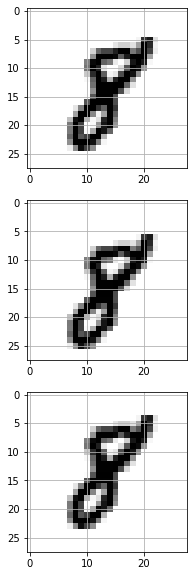

In [9]:
f, ax = plt.subplots(3,1, figsize=(10,10))
ax[0].imshow(X_train_arr[17].reshape(28,28), cmap='binary')
ax[1].imshow(X_train_shifted_d[17].reshape(28,28), cmap='binary')
ax[2].imshow(X_train_shifted_u[17].reshape(28,28), cmap='binary')
ax[0].grid()
ax[1].grid()
ax[2].grid()
# plt.imshow(X_train_arr[27].reshape(28,28), cmap='binary')
# plt.grid()
# plt.show()

In [10]:
X_train_shifted = np.vstack((X_train_arr, X_train_shifted_r, X_train_shifted_l, X_train_shifted_u, X_train_shifted_d))

In [11]:
y_train_arr = np.array(y_train)
y_train_shifted = np.hstack((y_train_arr, y_train_arr, y_train_arr, y_train_arr, y_train_arr))

In [12]:
len(y_train_shifted)

300000

In [13]:
len(X_train_shifted)

300000

In [20]:
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')

In [169]:
#scaler = StandardScaler()

#X_train_shifted_scaled = scaler.fit_transform(X_train_shifted.astype(np.float64))

In [7]:
#Testing the best model on the non-scaled, original training set
params = {'weights':['distance'], 'n_neighbors': [4]}
gridsearch = GridSearchCV(knn, params, cv=2, verbose=3, scoring='accuracy')
gridsearch.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END ...n_neighbors=4, weights=distance;, score=0.968 total time=  55.2s
[CV 2/2] END ...n_neighbors=4, weights=distance;, score=0.966 total time=  58.8s


GridSearchCV(cv=2,
             estimator=KNeighborsClassifier(n_neighbors=4, weights='distance'),
             param_grid={'n_neighbors': [4], 'weights': ['distance']},
             scoring='accuracy', verbose=3)

In [8]:
from sklearn.metrics import accuracy_score

y_pred = gridsearch.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

In [21]:
knn.fit(X_train_shifted, y_train_shifted)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [22]:
y_pred = knn.predict(X_test)

In [23]:
accuracy_score(y_test, y_pred)

0.9763

In [15]:
#Trying a different distance measure
knn = KNeighborsClassifier(n_neighbors=4, weights='distance', p=1)

In [16]:
knn.fit(X_train_shifted, y_train_shifted)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [17]:
y_pred = knn.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9702